<a href="https://colab.research.google.com/github/Shivani11032006/codes/blob/main/ElectricMotorPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
file_path = "/content/temperature_data.csv"

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb


In [18]:
df = pd.read_csv(file_path)
df

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
133668  0.671523  0.986426  0.330210 -1.127658    -1.141269 -0.249945   
133669  0.665867  0.986416  0.330031 -1.128041    -1.141264 -0.250109   
133670  0.659251  0.986148  0.330234 -1.127636    -1.141272 -0.249954   
133671  0.648304  0.986209  0.330143 -1.127663    -1.141262 -0.250045   
133672  0.636170  0.986872  0.330330 -1.127664    -1.141200       NaN   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
133668  1.029139 -0.245751 -0.321659     0.444822     -0.004535   
133669  1.029147 -0.245749 -0.321860     0.444917     -0.004063   
133670  1.029145 -0.245754 -0.321716     0.444650     -0.003624   
133671  1.029146 -0.245755 -0.321850     0.444074     -0.003842   
133672       NaN       NaN       NaN          NaN           NaN   

        stator_winding  profile_id  
0            -2.018033         4.0  
1            -2.017631         4.0  
2            -2.017343         4.0  
3            -2.017632         4.0  
4            -2.018145         4.0  
...                ...         ...  
133668       -0.330025        20.0  
133669       -0.329848        20.0  
133670       -0.329391        20.0  
133671       -0.330080        20.0  
133672             NaN         NaN  

[133673 rows x 13 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133673 entries, 0 to 133672
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         133673 non-null  float64
 1   coolant         133673 non-null  float64
 2   u_d             133673 non-null  float64
 3   u_q             133673 non-null  float64
 4   motor_speed     133673 non-null  float64
 5   torque          133672 non-null  float64
 6   i_d             133672 non-null  float64
 7   i_q             133672 non-null  float64
 8   pm              133672 non-null  float64
 9   stator_yoke     133672 non-null  float64
 10  stator_tooth    133672 non-null  float64
 11  stator_winding  133672 non-null  float64
 12  profile_id      133672 non-null  float64
dtypes: float64(13)
memory usage: 13.3 MB


In [20]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            1
i_d               1
i_q               1
pm                1
stator_yoke       1
stator_tooth      1
stator_winding    1
profile_id        1
dtype: int64

In [21]:
df.head()


ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033         4.0  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631         4.0  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343         4.0  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632         4.0  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145         4.0

In [22]:
# Drop unnecessary columns like 'profile_id' since they are session-specific and should not be used for prediction
df = df.drop(columns=['profile_id'])

# Fill missing values using forward-fill or median imputation
df = df.fillna(df.median())

# Check for any remaining missing values
df.isnull().sum()

# Define feature columns and target column (motor_speed)
X = df.drop(columns=['motor_speed'])
y = df['motor_speed']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
df = df.fillna(df.median())

In [24]:
df.isnull().sum()


ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
dtype: int64

In [25]:
X = df.drop(columns=['motor_speed'])
y = df['motor_speed']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
r = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred_lr = linear_model.predict(X_test_scaled)

In [31]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)


In [35]:
print(f'Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}, R2: {r2_lr}')

Linear Regression - MAE: 0.1297133647343011, RMSE: 0.1904922734869256, R2: 0.9673612613518269


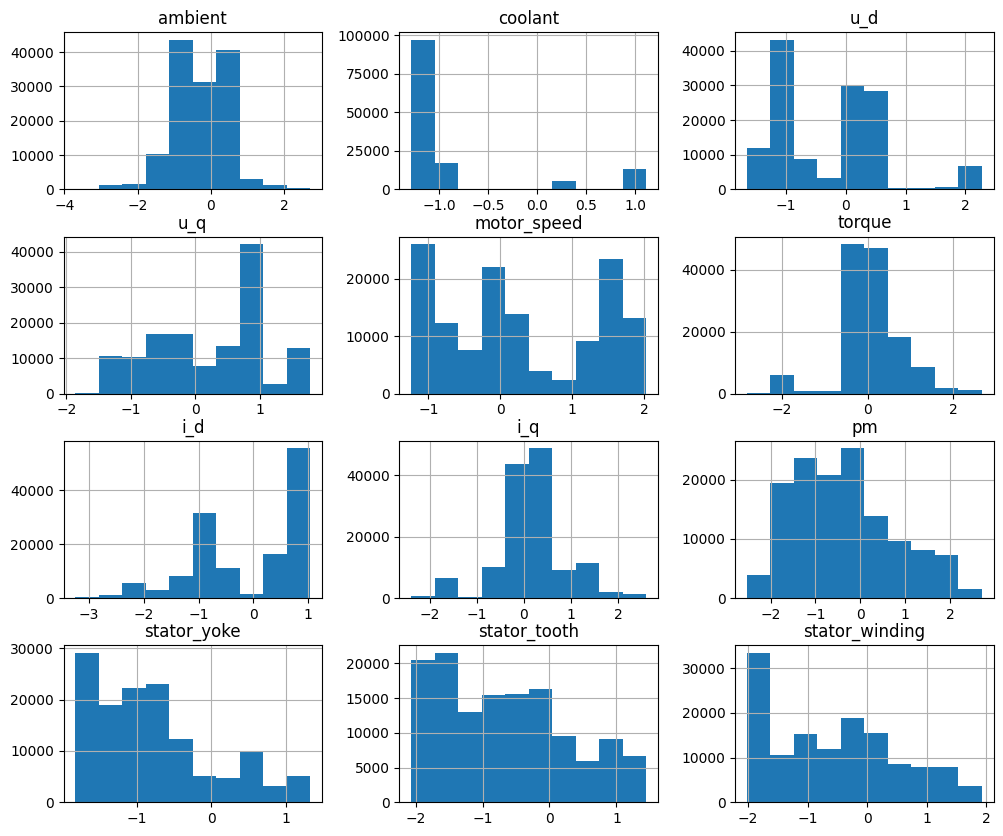

In [36]:
df.hist(figsize=(12, 10))
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133673 entries, 0 to 133672
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         133673 non-null  float64
 1   coolant         133673 non-null  float64
 2   u_d             133673 non-null  float64
 3   u_q             133673 non-null  float64
 4   motor_speed     133673 non-null  float64
 5   torque          133673 non-null  float64
 6   i_d             133673 non-null  float64
 7   i_q             133673 non-null  float64
 8   pm              133673 non-null  float64
 9   stator_yoke     133673 non-null  float64
 10  stator_tooth    133673 non-null  float64
 11  stator_winding  133673 non-null  float64
dtypes: float64(12)
memory usage: 12.2 MB


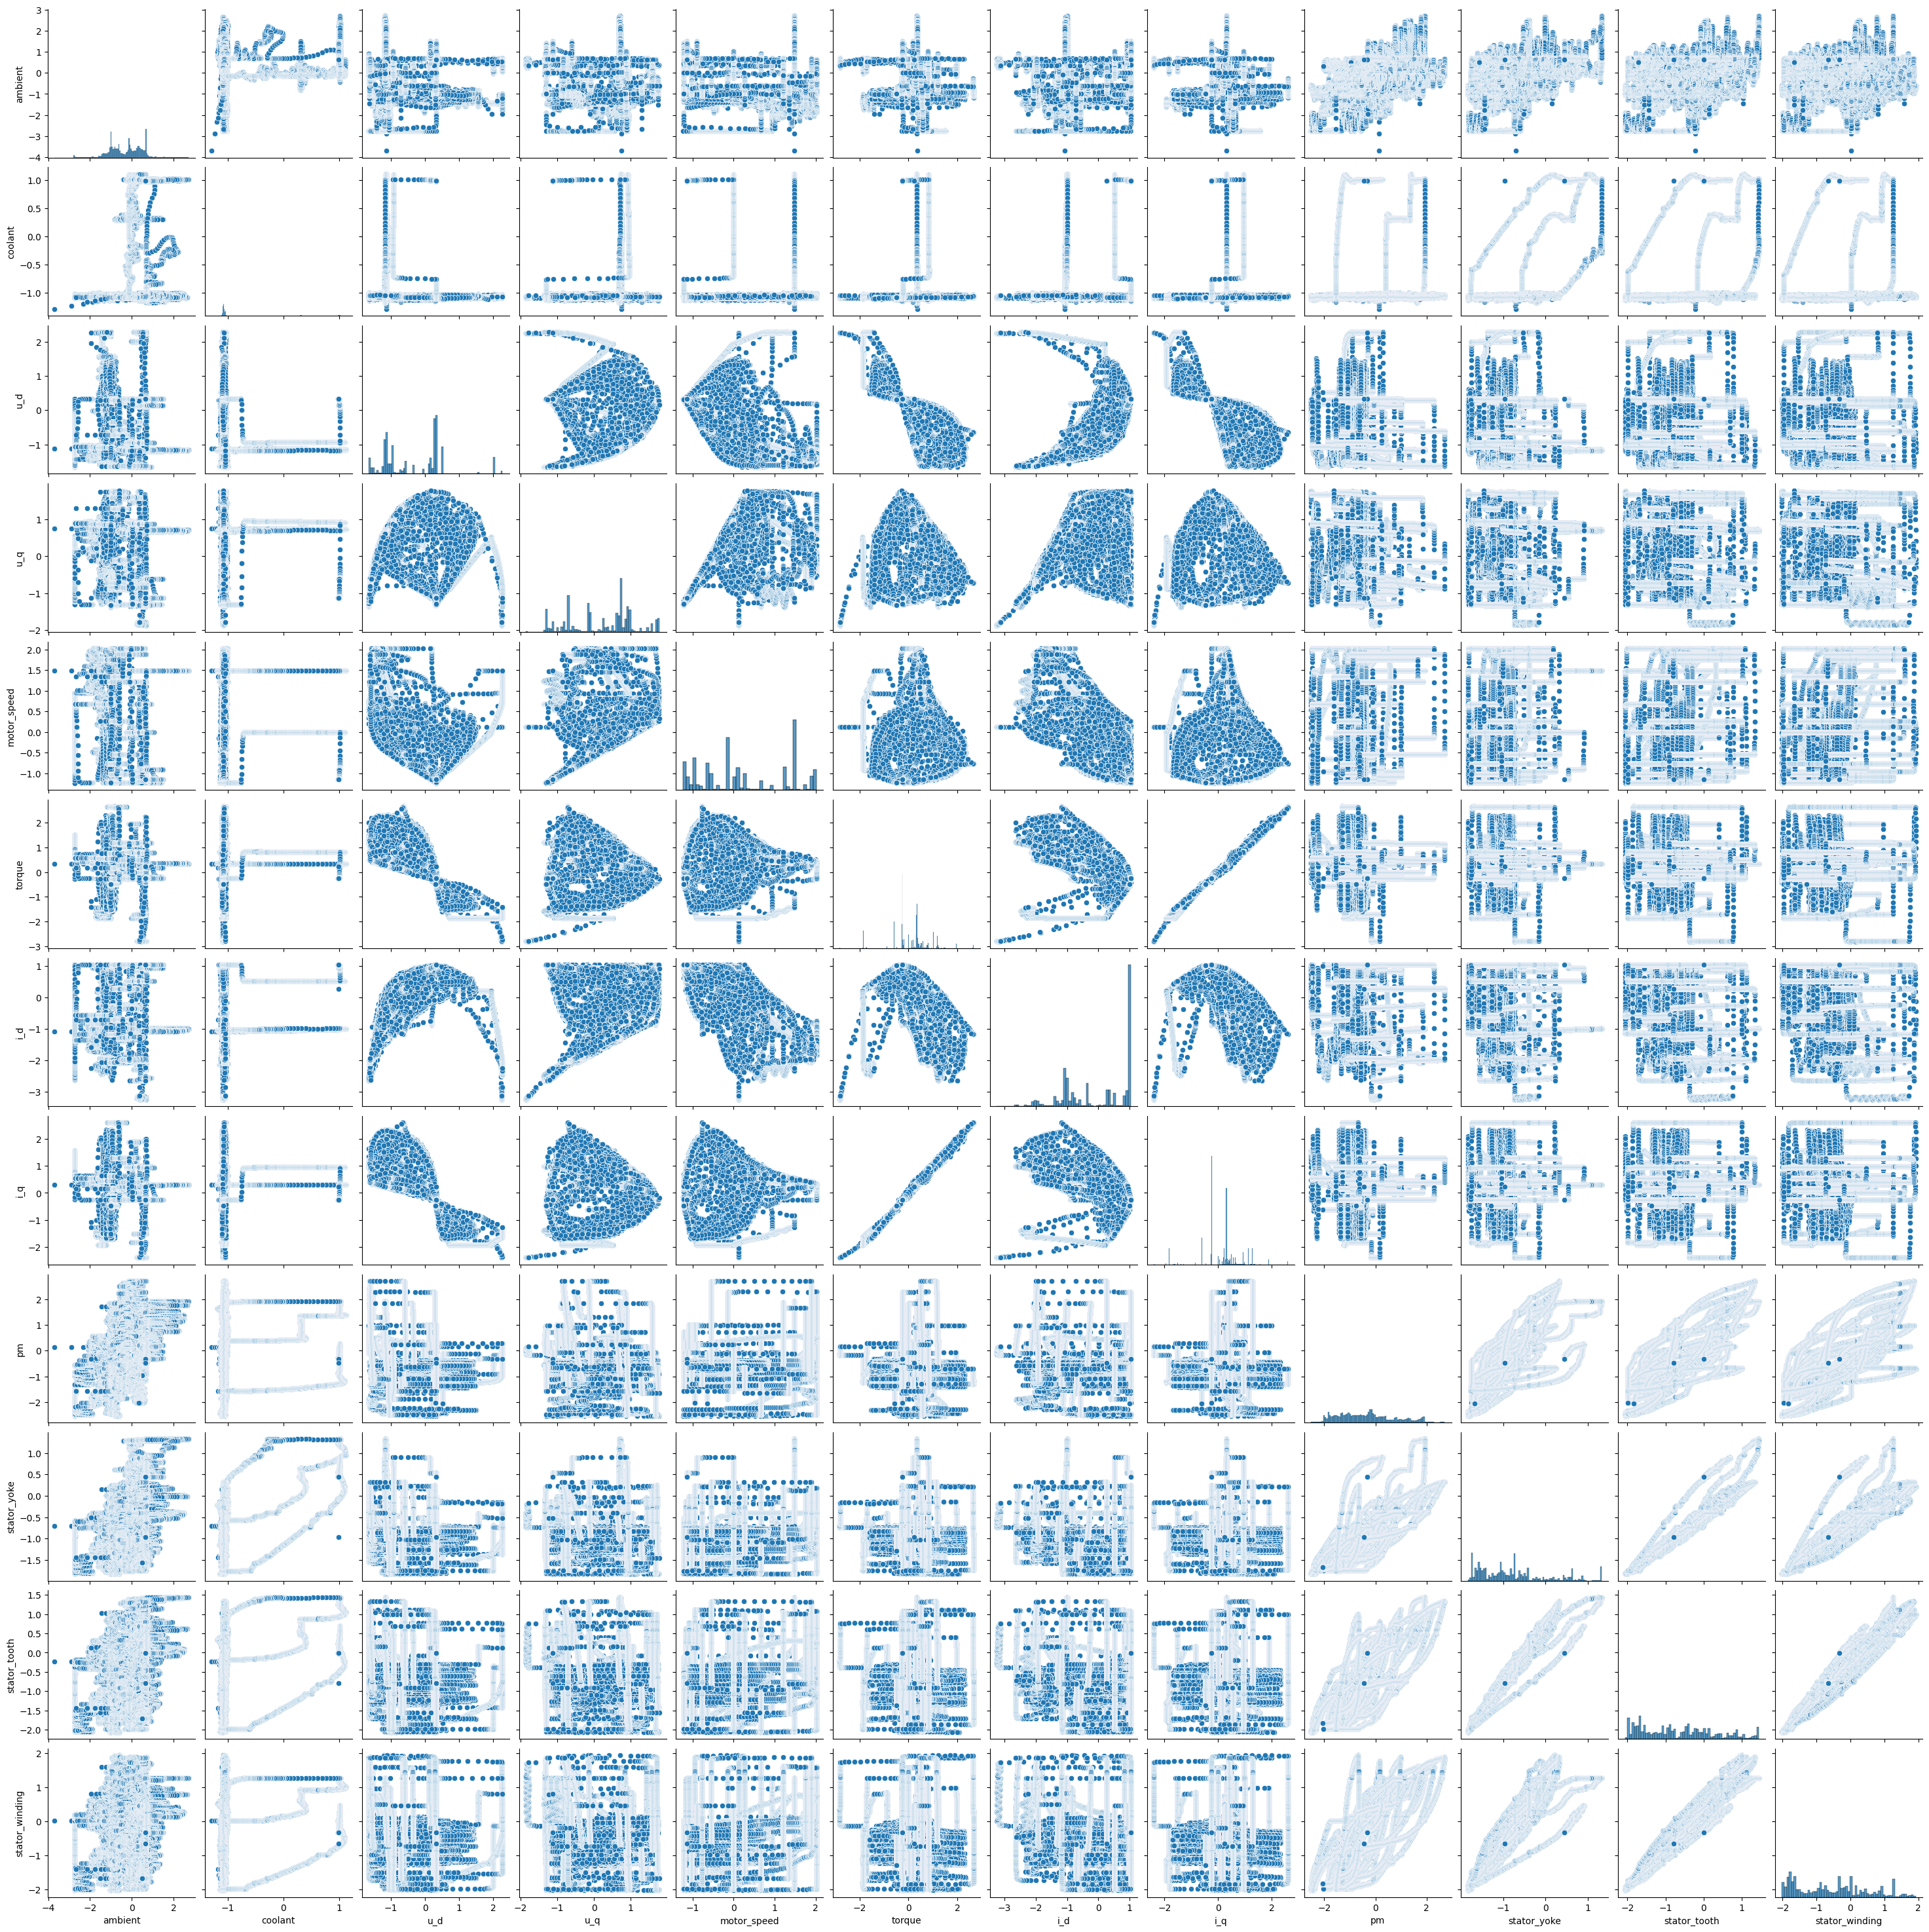

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
sns.pairplot(df)
plt.show()

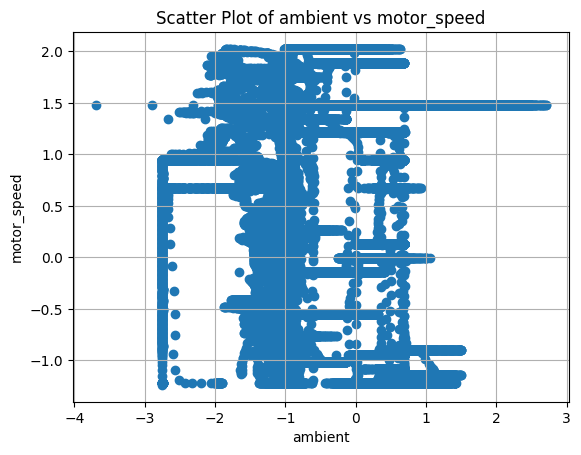

In [39]:
plt.scatter(df['ambient'], df['motor_speed'])
plt.xlabel('ambient')
plt.ylabel('motor_speed')
plt.title('Scatter Plot of ambient vs motor_speed')
plt.grid()
plt.show()

In [40]:
print(df.isnull().sum())

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
dtype: int64


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['ambient', 'motor_speed']] = scaler.fit_transform(df[['ambient', 'motor_speed']])
print(df.head())


    ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0  0.459611 -1.118446  0.327935 -1.297858     0.005085 -0.250182  1.029572   
1  0.456629 -1.117021  0.329665 -1.297686     0.005084 -0.249133  1.029509   
2  0.454815 -1.116681  0.332771 -1.301822     0.005085 -0.249431  1.029448   
3  0.455120 -1.116764  0.333700 -1.301852     0.005084 -0.248636  1.032845   
4  0.456196 -1.116775  0.335206 -1.303118     0.005084 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145  


<Figure size 1000x600 with 0 Axes>

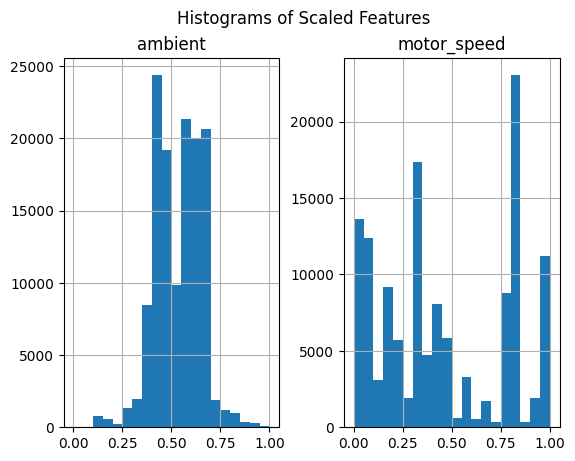

In [43]:
plt.figure(figsize=(10,6))
df[['ambient', 'motor_speed']].hist(bins=20)
plt.suptitle('Histograms of Scaled Features')
plt.show()

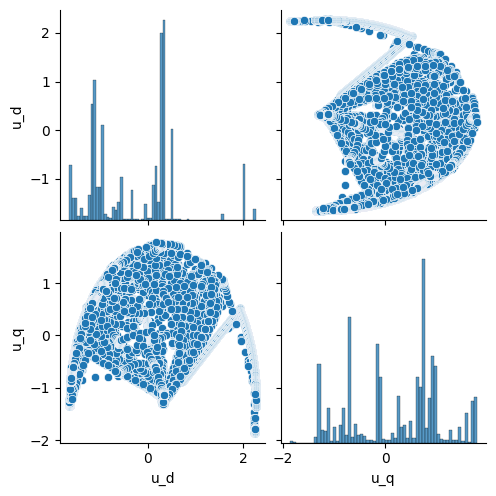

In [44]:
sns.pairplot(df[['u_d',	'u_q']])
plt.show()


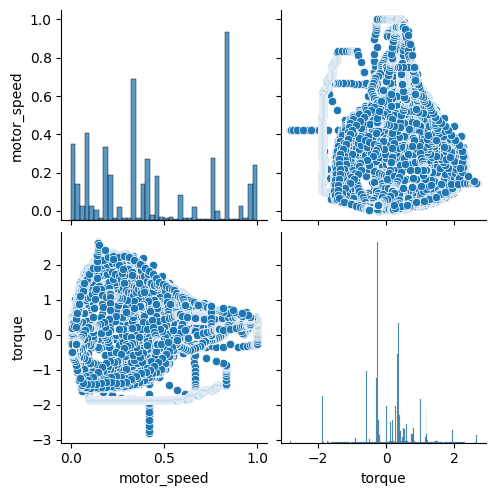

In [45]:
sns.pairplot(df[['motor_speed',	'torque']])
plt.show()

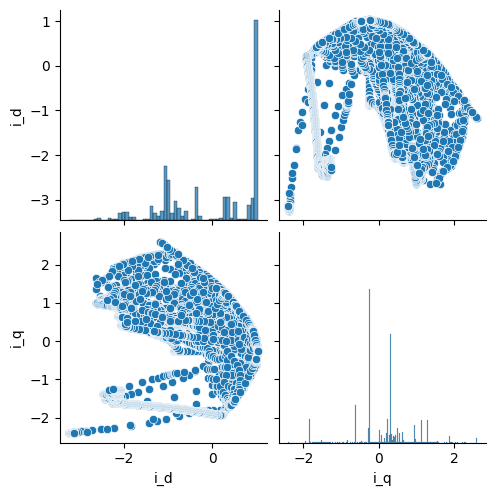

In [46]:
sns.pairplot(df[['i_d','i_q']])
plt.show()


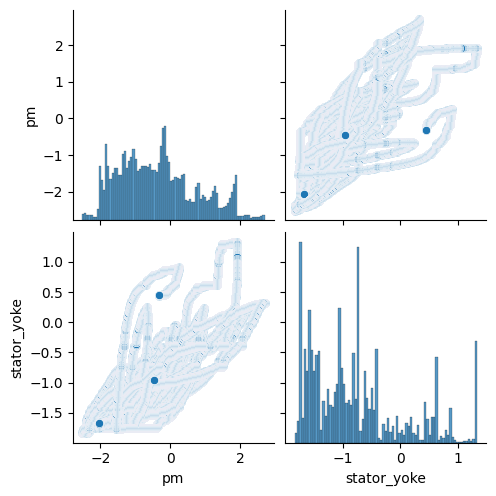

In [47]:
sns.pairplot(df[['pm',	'stator_yoke']])
plt.show()


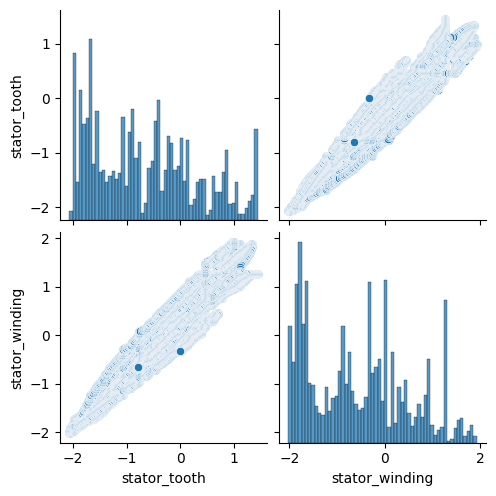

In [48]:
sns.pairplot(df[['stator_tooth',	'stator_winding']])
plt.show()


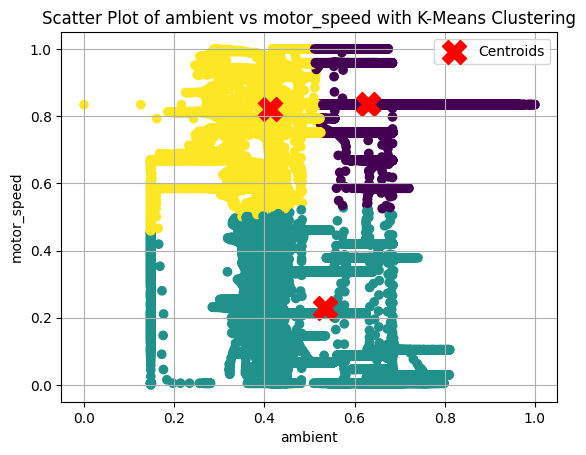

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame containing 'ambient' and 'motor_speed' columns

# Select the features for clustering
X = df[['ambient', 'motor_speed']].values

# Determine the optimal number of clusters (e.g., using the elbow method)
# ... (Code for determining optimal k) ...

# Perform k-means clustering with the determined k
k = 3  # Replace with the optimal k value
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Visualize the clusters on a scatter plot
plt.scatter(df['ambient'], df['motor_speed'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('ambient')
plt.ylabel('motor_speed')
plt.title('Scatter Plot of ambient vs motor_speed with K-Means Clustering')
plt.grid()
plt.legend()
plt.show()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("temperature_data.csv")

# 1. Interaction Features: Create new features by multiplying existing ones
df['ambient_x_torque'] = df['ambient'] * df['torque']
df['i_d_x_i_q'] = df['i_d'] * df['i_q']

# 2. Polynomial Features: Capture non-linear relationships
df['ambient_squared'] = df['ambient'] ** 2
df['torque_cubed'] = df['torque'] ** 3

# 3. Domain-Specific Features: Create features based on your knowledge
# Example: Calculate total resistance using physics formulas if applicable

# 4. Feature Scaling (using StandardScaler)
# Select numerical features for scaling
numerical_features = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
                     'torque', 'i_d', 'i_q', 'pm', 'stator_yoke',
                     'stator_tooth', 'stator_winding', 'ambient_x_torque',
                     'i_d_x_i_q', 'ambient_squared', 'torque_cubed']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# ... (rest of your code: model training, evaluation, etc.)

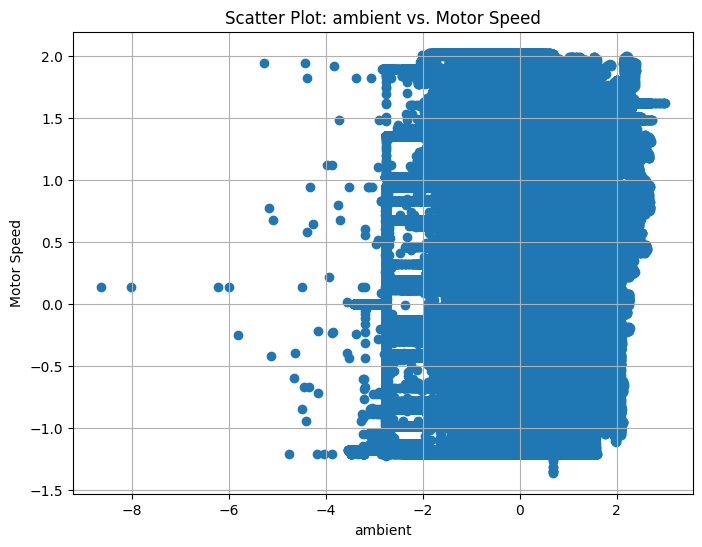

Correlation between ambient and Motor Speed: 0.08


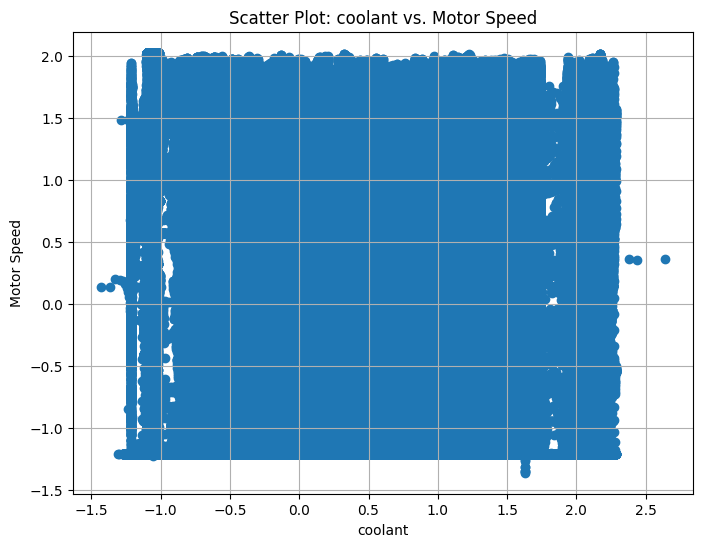

Correlation between coolant and Motor Speed: -0.03


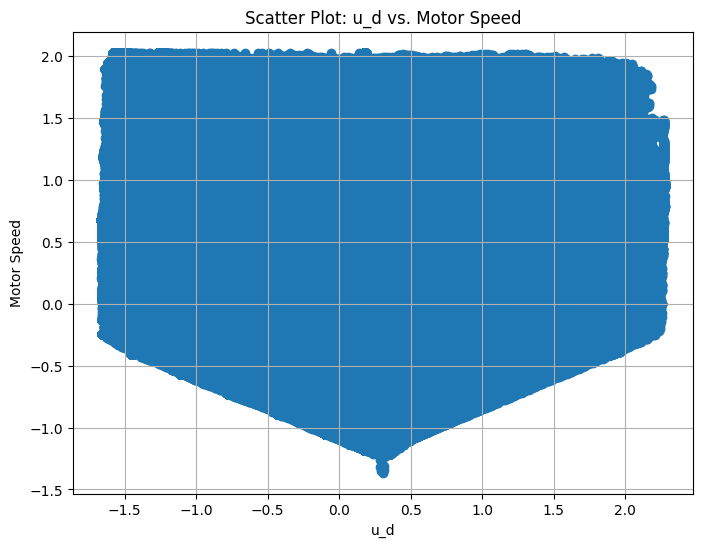

Correlation between u_d and Motor Speed: -0.23


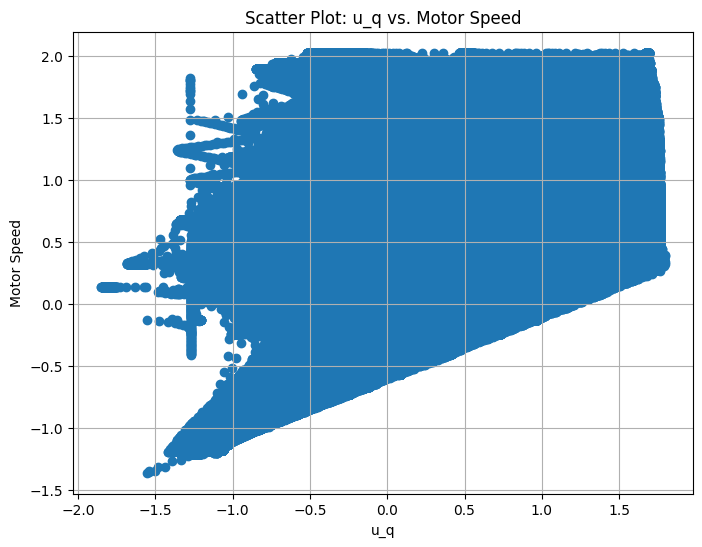

Correlation between u_q and Motor Speed: 0.72


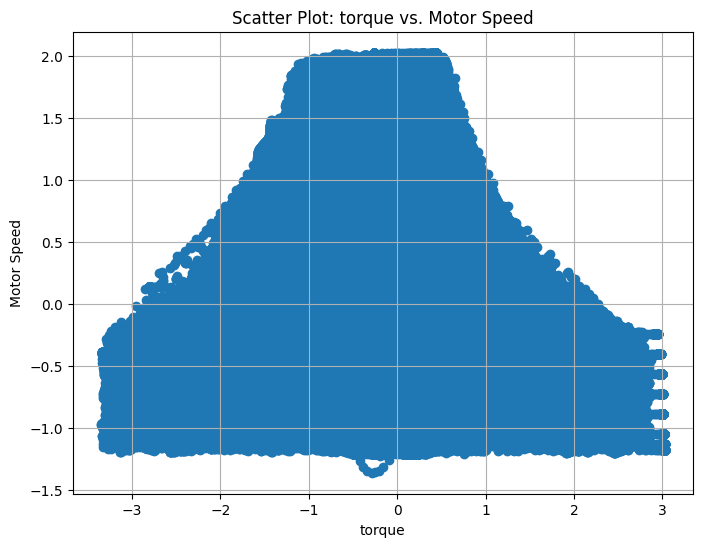

Correlation between torque and Motor Speed: 0.02


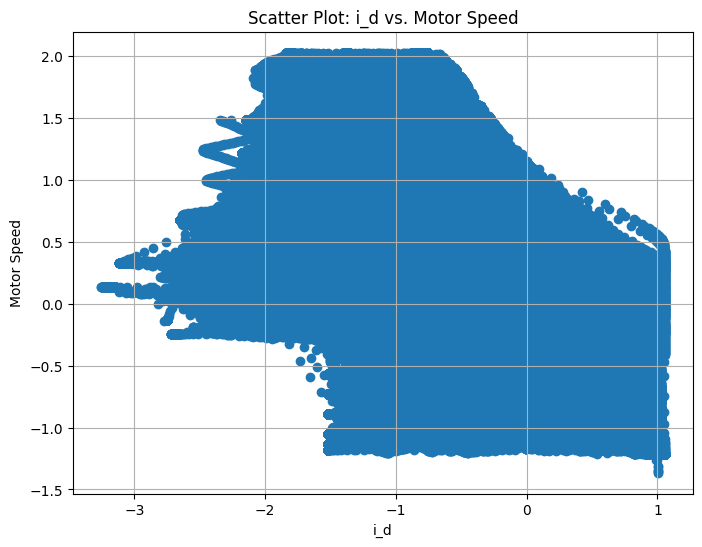

Correlation between i_d and Motor Speed: -0.72


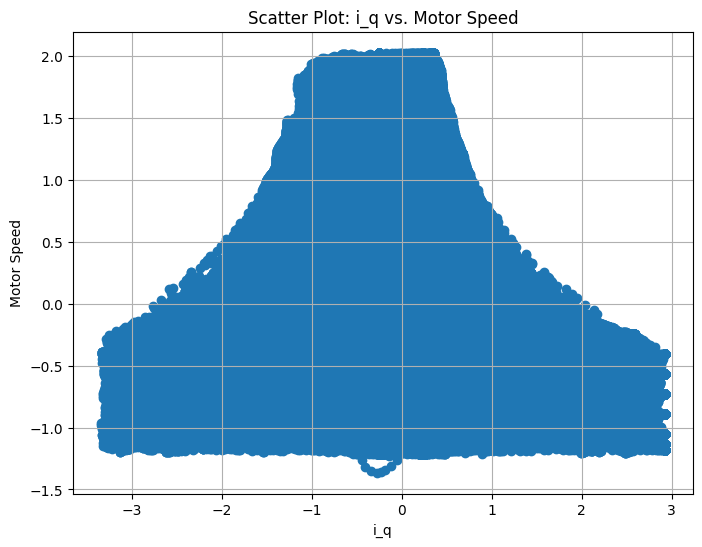

Correlation between i_q and Motor Speed: 0.01


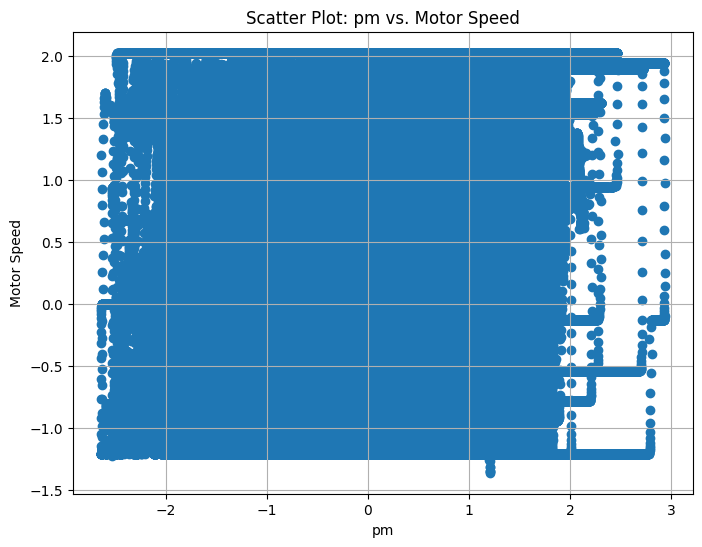

Correlation between pm and Motor Speed: 0.33


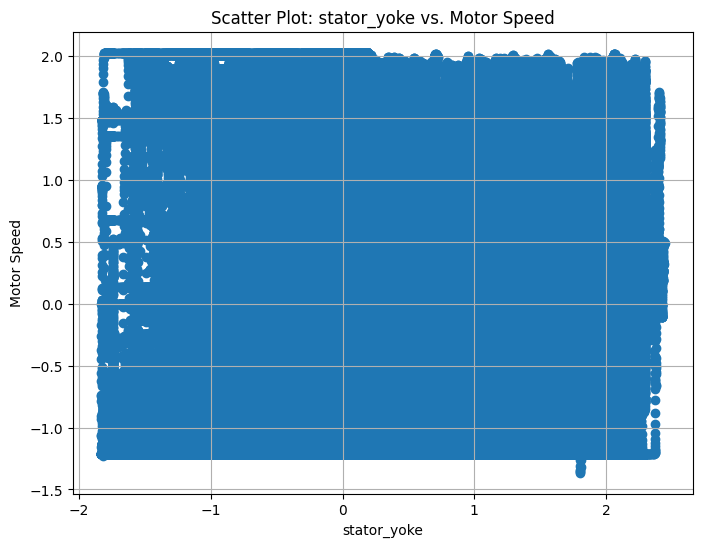

Correlation between stator_yoke and Motor Speed: 0.18


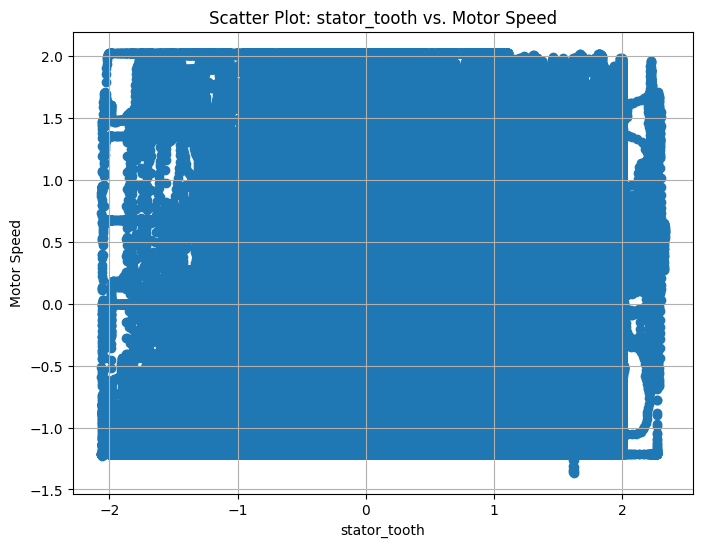

Correlation between stator_tooth and Motor Speed: 0.33


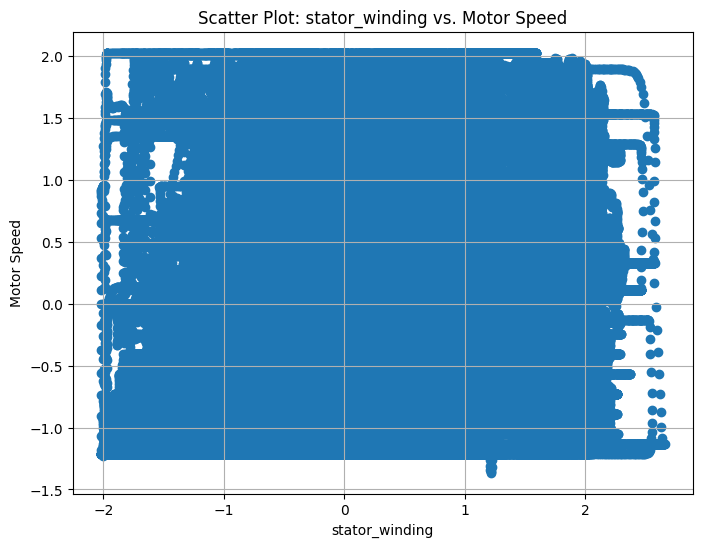

Correlation between stator_winding and Motor Speed: 0.39


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data

# List of numerical features to analyze
numerical_features = ['ambient', 'coolant', 'u_d', 'u_q',
                     'torque', 'i_d', 'i_q', 'pm', 'stator_yoke',
                     'stator_tooth', 'stator_winding']

# Univariate analysis and visualization
for feature in numerical_features:
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['motor_speed'])
    plt.xlabel(feature)
    plt.ylabel('Motor Speed')
    plt.title(f'Scatter Plot: {feature} vs. Motor Speed')
    plt.grid(True)
    plt.show()

    # Correlation coefficient
    correlation = df[feature].corr(df['motor_speed'])
    print(f"Correlation between {feature} and Motor Speed: {correlation:.2f}")


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame containing the data

# Define features (X) and target (y)
X = df.drop(columns=['motor_speed'])
y = df['motor_speed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree - Mean Squared Error: {mse:.4f}")
print(f"Decision Tree - R-squared: {r2:.4f}")

Decision Tree - Mean Squared Error: 0.0003
Decision Tree - R-squared: 0.9997


In [7]:
!pip install stable-baselines3
!pip install gym

import pandas as pd
import numpy as np
import gym
from gym import spaces
from stable_baselines3 import PPO

# 1. Create a custom Gym environment
class MotorControlEnv(gym.Env):
    def __init__(self, df):
        super(MotorControlEnv, self).__init__()
        self.df = df
        self.current_step = 0

        # Define action and observation spaces
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)  # Continuous action: Adjust motor speed
        self.observation_space = spaces.Box(low=df[['ambient']].min().values,
                                            high=df[['ambient']].max().values,
                                            shape=(1,), dtype=np.float32)  # Observation: ambient temperature

    def reset(self):
        self.current_step = 0
        self.state = self.df.iloc[self.current_step][['ambient']].values.astype(np.float32)
        return self.state

    def step(self, action):
        # Simulate the motor's response to the action
        # (You would replace this with your actual motor control logic)

        # Example: Adjust motor speed proportionally to the action
        # Assuming 'motor_speed' is a column in your DataFrame
        self.df.loc[self.current_step, 'motor_speed'] += action[0] * 0.1

        # Calculate reward (e.g., based on desired motor speed and energy efficiency)
        # (You would define your specific reward function here)

        # Example: Reward for reaching a target motor speed
        target_motor_speed = 100  #

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [8]:

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the selected columns and transform them
df[['ambient', 'motor_speed']] = scaler.fit_transform(df[['ambient', 'motor_speed']])

# Print the first few rows of the DataFrame to see the scaled values
print(df.head())

    ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0  0.677737 -1.120454  0.323842 -1.289164     0.043909 -0.247367  1.024560   
1  0.676080 -1.119032  0.325575 -1.288994     0.043909 -0.246316  1.024497   
2  0.675073 -1.118693  0.328689 -1.293119     0.043909 -0.246615  1.024435   
3  0.675242 -1.118776  0.329619 -1.293150     0.043908 -0.245818  1.027836   
4  0.675840 -1.118787  0.331128 -1.294413     0.043909 -0.245883  1.026797   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  \
0 -0.243174 -2.528584    -1.830112     -2.064767       -2.017442           4   
1 -0.243146 -2.528932    -1.829659     -2.063483       -2.017040           4   
2 -0.243132 -2.529189    -1.829091     -2.062697       -2.016752           4   
3 -0.244271 -2.528150    -1.829024     -2.061760       -2.017041           4   
4 -0.243925 -2.528413    -1.829189     -2.061418       -2.017555           4   

   ambient_x_torque  i_d_x_i_q  ambient_squared  t

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the data

# 1. Interaction Features: Create new features by multiplying existing ones
df['ambient_x_torque'] = df['ambient'] * df['torque']
df['i_d_x_i_q'] = df['i_d'] * df['i_q']

# 2. Polynomial Features: Capture non-linear relationships
df['ambient_squared'] = df['ambient'] ** 2
df['torque_cubed'] = df['torque'] ** 3

# 3. Domain-Specific Features: Create features based on your knowledge
# Example: Calculate total resistance using physics formulas if applicable

# 4. Feature Scaling (using StandardScaler)
# Select numerical features for scaling
numerical_features = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
                     'torque', 'i_d', 'i_q', 'pm', 'stator_yoke',
                     'stator_tooth', 'stator_winding', 'ambient_x_torque',
                     'i_d_x_i_q', 'ambient_squared', 'torque_cubed']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# ... (rest of your code: model training, evaluation, etc.)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the data

# 1. Split data into training and testing sets
X = df.drop(columns=['motor_speed'])  # Features
